#Basit bir Yinelemeli Sinir Ağını Numpy ile Oluşturmak

In [ ]:
import numpy as np

In [ ]:
timesteps = 100 #girişteki zaman adımı sayısı
input_features = 32 #girdi nitelik uzayının boyutu
output_features = 64 #çıktı nitelik uzayının boyutu

###Basit olması için girdi verisini rastgele gürültü olarak seçelim

In [ ]:
inputs = np.random.random((timesteps, input_features))

###Başlangıç durumu için tüm elemanları sıfırdan oluşan bir vektör oluşturalım

In [ ]:
state_t = np.zeros((output_features,))

###Rastgele oluşturulan ağırlık matrisleri

In [ ]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

### Girdi ve mevcut duruma göre çıktının oluşturulması

In [ ]:
successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) +b)
  successive_outputs.append(output_t)
  state_t = output_features

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [ ]:
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [ ]:
output_t

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

##YİNELEMELİ SİNİR AĞI KATMANLARININ OLUŞTURULMASI

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

Örnek 1: Bir RNN katmanı

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###Örnek 2: Boyutlandırılmış RNN katmanı

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###Örnek 3: Ardışık RNN katmanları

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#IMDB VERİ KÜMESİNİ HAZIRLAMAK

###IMDB: Internet Movie Database (Internet Film Veritabanı)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
num_features = 1000
maxlen = 500
batch_size = 32

In [ ]:
print("Load data..")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_features)

print(len(input_train), "Eğitim dizisi")
print(len(input_test), "test dizisi")

Load data..
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 Eğitim dizisi
25000 test dizisi


In [ ]:
print("Pad sequence (sample x train)")

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(len(input_train), "Eğitim dizisi", input_train.shape)
print(len(input_test), "test dizisi", input_test.shape)

Pad sequence (sample x train)
25000 Eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


###EMBEDDING ve SimpleRNN Katmanlarının Eğitilmesi

In [ ]:
from keras.layers import Dense
from keras import layers

##Basit RNN ile Modelleme

In [ ]:
model_Sequential = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 32)             │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 32, 32)              │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,617 (1.33 MB)

 Trainable params: 191,364 (747.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 157,253 (614.27 KB)

##Basit bir LSTM ile Modelleme

In [ ]:
model_Sequential = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 32)             │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 32, 32)              │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_7 (Embedding)              │ (None, 1, 32)               │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,322 (1.52 MB)

 Trainable params: 240,069 (937.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 157,253 (614.27 KB)

#Modelin derlenmesi RNN

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - acc: 0.4985 - loss: 0.6935 - val_acc: 0.4938 - val_loss: 0.6932
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 236ms/step - acc: 0.4940 - loss: 0.6933 - val_acc: 0.5062 - val_loss: 0.6936
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 209ms/step - acc: 0.5013 - loss: 0.6935 - val_acc: 0.4938 - val_loss: 0.6934
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - acc: 0.5037 - loss: 0.6933 - val_acc: 0.5062 - val_loss: 0.6931
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - acc: 0.5036 - loss: 0.6932 - val_acc: 0.5062 - val_loss: 0.6931
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - acc: 0.4975 - loss: 0.6933 - val_acc: 0.5062 - val_loss: 0.6931
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - acc: 0.5000 - loss: 0.6932 - val_acc: 0.4938 - val_loss: 0.6945
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - acc: 0.5042 - loss: 0.6934 - val_acc: 0.5062 - val_loss: 0.6931
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s

##Modelin Derlenmesi LSTM

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'bias', 'embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - acc: 0.5055 - loss: 0.6932 - val_acc: 0.5062 - val_loss: 0.6931
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 206ms/step - acc: 0.4939 - loss: 0.6933 - val_acc: 0.4938 - val_loss: 0.6932
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - acc: 0.5051 - loss: 0.6931 - val_acc: 0.4938 - val_loss: 0.6933
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - acc: 0.4971 - loss: 0.6933 - val_acc: 0.4938 - val_loss: 0.6932
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - acc: 0.4974 - loss: 0.6932 - val_acc: 0.4938 - val_loss: 0.6934
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 228ms/step - acc: 0.4995 - loss: 0.6932 - val_acc: 0.4938 - val_loss: 0.6933
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 207ms/step - acc: 0.4913 - loss: 0.6933 - val_acc: 0.4938 - val_loss: 0.6933
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 232ms/step - acc: 0.4987 - loss: 0.6932 - val_acc: 0.4938 - val_loss: 0.6933
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s

#SONUÇLARIN ÇİZDİRİLMESİ

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
epochs = range(1, len(acc) + 1)

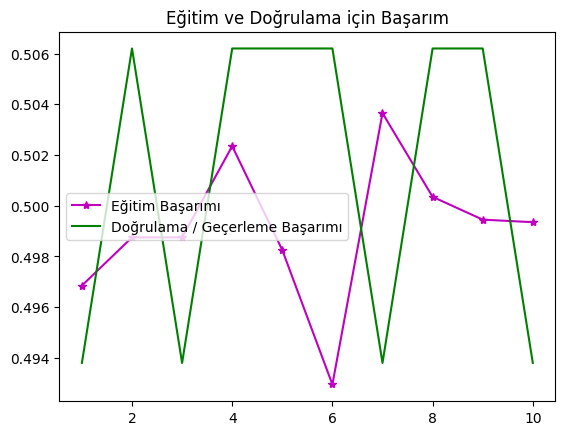

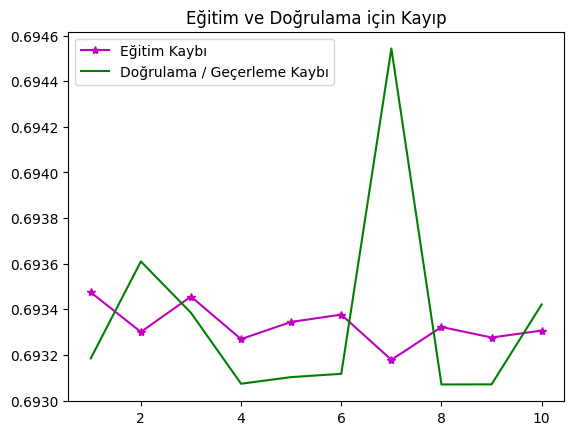

In [ ]:
plt.plot(epochs, acc, "m*-", label="Eğitim Başarımı")
plt.plot(epochs, val_acc, "g", label="Doğrulama / Geçerleme Başarımı")
plt.title("Eğitim ve Doğrulama için Başarım")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "m*-", label="Eğitim Kaybı")
plt.plot(epochs, val_loss, "g", label="Doğrulama / Geçerleme Kaybı")
plt.title("Eğitim ve Doğrulama için Kayıp")
plt.legend()

plt.show()

In [ ]:
print(acc, "eğitim başarımları")

[0.49685001373291016, 0.4987500011920929, 0.4987500011920929, 0.5023499727249146, 0.49825000762939453, 0.4929499924182892, 0.5036500096321106, 0.5003499984741211, 0.4994499981403351, 0.49935001134872437] eğitim başarımları


In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
epochs = range(1, len(acc) + 1)

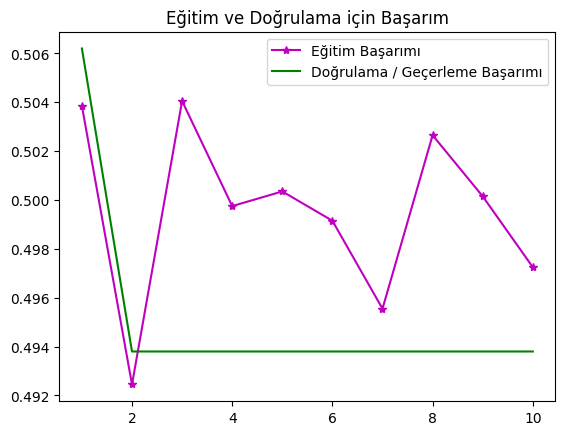

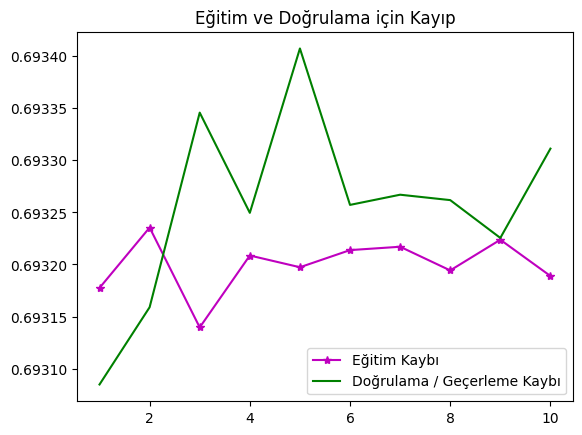

In [ ]:
plt.plot(epochs, acc, "m*-", label="Eğitim Başarımı")
plt.plot(epochs, val_acc, "g", label="Doğrulama / Geçerleme Başarımı")
plt.title("Eğitim ve Doğrulama için Başarım")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "m*-", label="Eğitim Kaybı")
plt.plot(epochs, val_loss, "g", label="Doğrulama / Geçerleme Kaybı")
plt.title("Eğitim ve Doğrulama için Kayıp")
plt.legend()

plt.show()